# MAE 301 Homework 1

## Problem 1: Review of linear algebra and calculus

### (2pt)
Let ${\bf c}$ be a *column vector*: ${\bf c} = [c_1, c_2, \cdots, c_n]^T$ where ``$T$'' *transposes* a vector (or matrix) and $n$ is the number of elements in the vector. Let ${\bf x}$ be another column vector of the same size. Write out the explicit expression of the vector product ${\bf c}^T{\bf x}$.






### (2pt)
Introduce a function $f({\bf x}) = {\bf c}^T{\bf x}$, i.e., the value of $f$ changes with ${\bf x}$. Write out the * gradient* of $({\bf x})$. (Hint: the gradient is defined as the row vector: $[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \cdots, \frac{\partial f}{\partial x_n}]$.)


### (2pt)
 Let $h({\bf x}) = \frac{1}{2}{\bf x}^T{\bf H}{\bf x}$ be another function. Write out its gradient and *Hessian*. (Hint: Hessian is the gradient of the gradient.)

### (2pt)
 For the following function
$$
f({\bf x}) = \frac{1}{2}{\bf x}^T{\bf H}{\bf x} + {\bf c}^T{\bf x},
$$
write out the expression of a stationary point. (Hint: A stationary point is such ${\bf x}$ that set the gradient to zero.)



### (2pt)
 In what condition will the stationary point be a {\it maximum} or a {\it minimum}? If you are not sure, try to find a solution from google:)

## Problem 2: Introduction to Python

Python is an *open source* scripting language, designed with a philosophy the original developers jokingly termed the *[Zen of Python](http://c2.com/cgi/wiki?PythonPhilosophy)*: 

1. Beautiful is better than ugly.
2. Explicit is better than implicit.
3. Simple is better than complex.
4. Complex is better than complicated.
5. Flat is better than nested.
6. Sparse is better than dense.
7. Readability counts.
8. Special cases aren't special enough to break the rules.
  - Although practicality beats purity.
9. Errors should never pass silently.
  - Unless explicitly silenced.
10. In the face of ambiguity, refuse the temptation to guess.
11. There should be one-- and preferably only one --obvious way to do it.
  - Although that way may not be obvious at first unless you're Dutch.
12. Now is better than never.
  - Although never is often better than right now.
13. If the implementation is hard to explain, it's a bad idea.
14. If the implementation is easy to explain, it may be a good idea.
15. [NameSpaces](http://c2.com/cgi/wiki?NameSpace) are one honking great idea -- let's do more of those!
    
-Tim Peters

Keep some of these things in mind, as using Python for scientific computing *can* be a wonderful experience, but it will often be very different from MatLab. 

There are many add-ons to Python, called Modules (and sometimes Libraries), that give Python the functionality you need for Scientific Computing. We recommend using Continuum Analytics' [Anaconda](http://continuum.io/downloads) distribution, as it pre-packages many, MANY of the modules used so often in science and engineering. For example, this homework is written in what is called Jupyter (formerly IPython), which is a very powerful IDE and notebook system. Think a cross between Sage, Mathematica, and Matlab. 

One anaconda is installed, you would simply run 

`ipython notebook`

in the command line/terminal to get started writing your own code. 

Two of the most important packages are **Numpy** and **Matplotlib**. The first is a matrix and numerical analysis package, and the second is a plotting/graphics library. Both are included in **Scipy**, which is included in **Anaconda** (along with many others, lucky us!). Let's use them now...in python it's as easy as importing!

![alt text](https://imgs.xkcd.com/comics/python.png "Thanks to Randall Munroe over @XKCD")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In Numpy, arrays are like matrices in Matlab BUT **indexed from 0!!!** (as it should be...). But, the * operator is not a vecotr product. Numpy does not assume any dimension, so the arrays can be N-dimensional. Use `np.dot()` for basic linear algebra.  

In [2]:
x = np.array([[1,2]]).T
A = np.array([[1,3],[4,2]])
A.dot(x)

array([[7],
       [8]])

However, if the need arises there is a `Matrix` class in numpy, that you may use for pure linear algebra. The docs reccomend to use the (much faster) arrays whenever possible. 


In [3]:
M = np.matrix([[1, 3],[4,2]])
b = np.matrix([1,2]).T
np.linalg.solve(M,b)

matrix([[ 0.4],
        [ 0.2]])

Let's do something more interesting...how about using probabilities to esimate $\pi$. We're going to throw thousands of rocks uniformly around on a square field. But, there's a quarter of a pond on this field, with a perfectly circular shape. This is called a *Monte Carlo* simulation. 

To do this, we need a package to obtain random numbers. The `random` package has a very good Mersenne Twister Pseudo-Random generator *built-in*!

### (2pts)
Show how we can derive $\pi$ if all we know are the $(x,y)$ coordinates of the rocks, and the radius $r$ of the pond

In [4]:
import random
%matplotlib inline


iterations=10000
pi=0
counter=0
in_circle=0
x_point=random.random()
y_point=random.random()
estimates=[]
average=[]

in_pts_x=[] #
in_pts_y=[]
x_pts=[]
y_pts=[]

while counter<iterations:
    if x_point**2 + y_point**2 <=1:
        counter+=1
        in_circle+=1
        x_pts+=[x_point]
        y_pts+=[y_point]
        in_pts_x+=[x_point]
        in_pts_y+=[y_point]
    else:
        counter+=1
        x_pts+=[x_point]
        y_pts+=[y_point]
    ratio = in_circle/float(counter)
    pi=4*ratio
         
    estimates+=[pi]
    
    #a floating average, mean of the last 1000 values given
    average+=[np.mean(estimates[-1000:])]

    x_point=random.random()
    y_point=random.random()
                    
print 'The integer approx is ', in_circle,'/',counter,'=',pi,' and the best adjusted value is',average[-1]




The integer approx is  7852 / 10000 = 3.1408  and the best adjusted value is 3.14219620117


Now We would like to se what exactly is going on...remember I told you about MatPlotLib? There are two ways to use this: with Matlab style syntax, or with a more Python-esque object oriented syntax (which is what I will be using below). For a wonderful look at many of the things Matplotlib can offer, look at [this tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). 

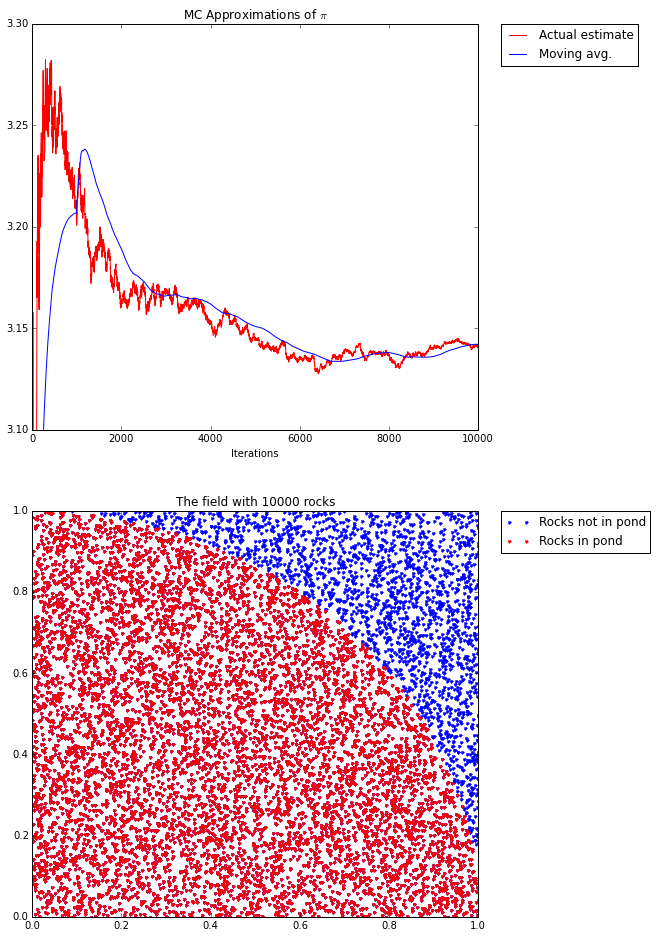

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,16))

ax[0].plot(estimates,'r-',average,'b-')
ax[0].axis([0,iterations,3.1,3.3])
ax[0].set_title(r'MC Approximations of $\pi$')
ax[0].set_xlabel('Iterations')
ax[0].legend(('Actual estimate','Moving avg.'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax[1].plot(x_pts,y_pts,'b.', label='Rocks not in pond')
ax[1].plot(in_pts_x,in_pts_y,'r.', label='Rocks in pond')
ax[1].axis([0,1,0,1])
ax[1].set_title('The field with '+str(iterations)+' rocks')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



### (2pts)
Ensure that the rocks were indeed thrown randomly using the `plt.hist()` function for both the $x$  and the $y$  coordinates. 

*hint:* you can pass multiple lists of data to `plt.hist()` by putting them into another list like `[x, y]`. What vars contain the $(x,y)$ data? 

What type of distribution is this approximating?

In [10]:
''' <-- delete these before executing

plt.hist( ??? , stacked=True)
plt.legend((r'$x$',r'$y$'),loc=0)

delete these before executing -->'''

" <-- delete these before executing\n\nplt.hist( ??? , stacked=True)\nplt.legend((r'$x$',r'$y$'),loc=0)\n\ndelete these before executing -->"


### (2pts)
See if you can write a script to continue throwing rocks in the pond until you reach a value for pi with arbitrary accuracy (i.e. between two other numbers, one too hi above $\pi$, and one too low). 

In [7]:
def arb_pi(low,hi):
    
    #Input the starting vars here (see above)
    #HINT Do we need to keep all of the estimates?
    
    while :# What are the two conditions to keep the sim running?
        
        #Like before, use an if/else statement
        if #???: 
            #if the rock is in the pond?
            
            #hint: will we need to save a list of coords?
        else:
            # if the rock is NOT in the pond?
            
            #there should only be one command here
            
        ratio = #??? # remember, Python 2.7 uses integer division...convert to float!
        pi= #???
        
        x_point=random.random()
        y_point=random.random()

    #-------leave this--------#
    print 'this took',in_circle, ' out of ', counter, 'points'
    print 'this estimate has a percent error of', 100*(np.pi-pi)/np.pi,'%'
    return pi
    #-------------------------#
print arb_pi(3.141592,3.141593)
#These two should give an approximation with ~ 1e-6 error. 

SyntaxError: invalid syntax (<ipython-input-7-5329aeba7a2b>, line 6)

Lastly, please take a look at the [IPython Notebook Viewer](http://nbviewer.ipython.org/) website for some really cool demos. Enjoy!